In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [42]:
pd.set_option('display.max_columns',None) #show all columns

In [43]:
df=pd.read_excel('Canada.xlsx',skiprows=20,
skipfooter=2,sheet_name='Canada by Citizenship')

## Preprocessing

In [44]:
cols_to_drop=['Type','Coverage','AREA','REG','DEV'] #list of unwanted cols
df.drop(columns=cols_to_drop,inplace=True)          # dropping the columns
years=range(1980,2014)                              # list of year 1980 2013
df.rename({            
    'OdName':'Country',
    'AreaName' : 'Continent',
    'Regname':'Region',
    'DevName':'Status'
},axis=1,inplace=True)                # remaning the columns to our prefernces
df.set_index('Country',inplace=True)  # making country as index as each country is unique for
df['Total']=df[years].sum(axis=1)     # adding a new columns from existing data
df.head(3)                            

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [ ]:
df.sort_values(by='Total',inplace=True,ascending=False)
df.head(10)

In [45]:
df.rename({'United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True)

In [ ]:
df.head(10)['Total'].plot(kind='pie',figsize=(15,5),title='Top 10 countries')

In [ ]:
df.head(10)['Total'].plot(kind='bar',figsize=(15,5),title='Top 10 countries')

In [ ]:
df.head(25)['Total'].plot(kind='bar',figsize=(15,5),title='Top 25 countries',
color='hotpink',alpha=.5,edgecolor='black',hatch='/')
plt.savefig('Top 25 countries with immigration.jpg',bbox_inches='tight')

In [ ]:
# how to view all setting of plot
df.plot?

In [ ]:
# compare India,UK,China immigration
countries= ['India','China','UK']
df.loc[countries,years]

In [ ]:
df.loc[countries,years].T.plot(kind='line',figsize=(10,6),
style=['ro-','g*-','bx-'],alpha=.5)

In [ ]:
px.funnel(df.head(),x=df.head().index,y=[1980,1990,2000,2010])

In [ ]:
df

# Line plots

In [ ]:
print(plt.style.available)
plt.style.use('ggplot')

In [ ]:
df.loc['Japan',years].plot(linewidth=2,color='black',linestyle='solid',marker='o',markersize=10,
    figsize=(25,6),xlabel='years' ,ylabel='No. of People',fontsize=20,
    grid=False,title='Immigration Trends of Japan to Canada (1980-2013)')

In [ ]:
df.loc['India',years].plot(linewidth=2,color='black',linestyle='solid',marker='o',markersize=10,
    figsize=(25,6),xlabel='years' ,ylabel='No. of People',fontsize=20,
    grid=False,title='Immigration Trends of Japan to Canada (1980-2013)')

# area plots

In [ ]:
df.loc['Republic of Korea',years].plot(kind='area',alpha=.5,color='blue')

In [ ]:
countries=['India','Japan','China']
colors=['blue','red','yellow']
df.loc[countries,years].T.plot(kind='area',alpha=.5,color=colors,stacked=False)

In [ ]:
df.loc[countries,years].T.plot(kind='area',alpha=.5,color=colors,stacked=False,
    subplots=True,figsize=(25,6),layout=(1,3))

In [ ]:
df.head()

# pie chart

In [ ]:
df.loc['India',years].plot(kind="pie")

In [ ]:

df['Total'].head(10).plot(kind='pie',radius=2,
   autopct="%.1f%%",wedgeprops={"width":.4},textprops={'color':'#333'})

In [ ]:
df['Continent'].unique()

# filter

In [ ]:
df[df['Continent']=='Europe']['Total'].head(10).plot(kind='pie',radius=2,
   autopct="%.1f%%",wedgeprops={"width":.4},textprops={'color':'#333'})

# top 10 countries with immigration with status =='developed'

In [ ]:
df[df['Status']=='Developed regions']['Total'].head(10).plot(kind='pie',radius=2,
   autopct="%.1f%%",wedgeprops={"width":.4},textprops={'color':'#333'})

## groupby

In [ ]:
cdf=df.groupby(by='Continent')[list(years)].sum()
cdf

In [46]:
df

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985


In [ ]:
df.groupby(by='Continent')[list(years)].agg([max,min])

In [ ]:
df.groupby(by='Continent')[list(years)].agg(['median','mean','count','std'])

In [ ]:
df.groupby(by='Continent')[list(years)].agg(['median','mean',])

# Histogram

<AxesSubplot: ylabel='Frequency'>

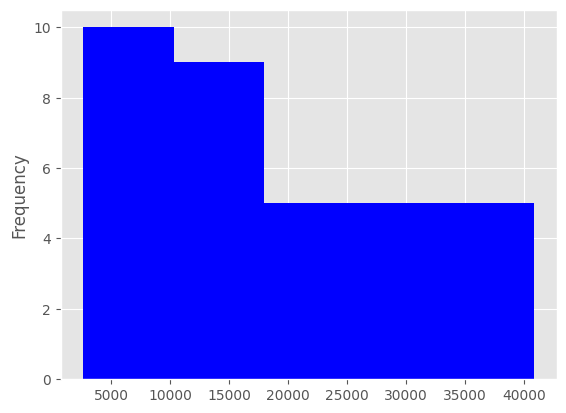

In [40]:
cdf.loc['Africa',years].plot(kind='hist',bins=5,color='blue')

<AxesSubplot: ylabel='Frequency'>

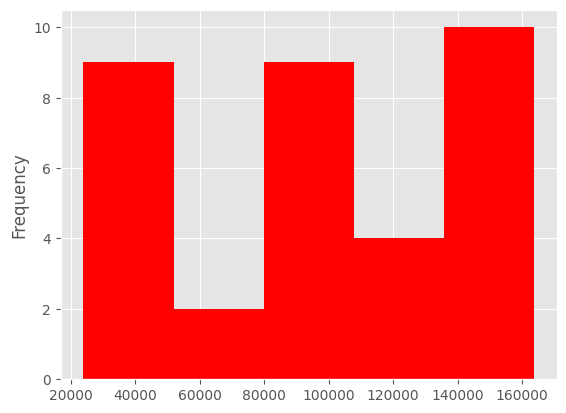

In [41]:
cdf.loc['Asia',years].plot(kind='hist',bins=5,color='red')

In [ ]:
cdf.loc['Asia',years].plot(kind='kde')

In [ ]:
cdf[years].T.plot(kind='kde')

## box plot

<AxesSubplot: >

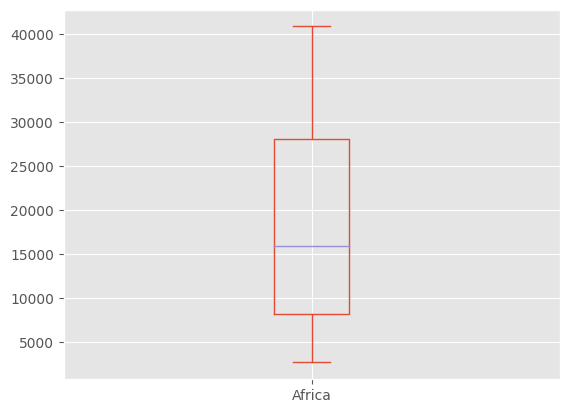

In [38]:
cdf.loc['Africa',years].plot(kind='box')

<AxesSubplot: >

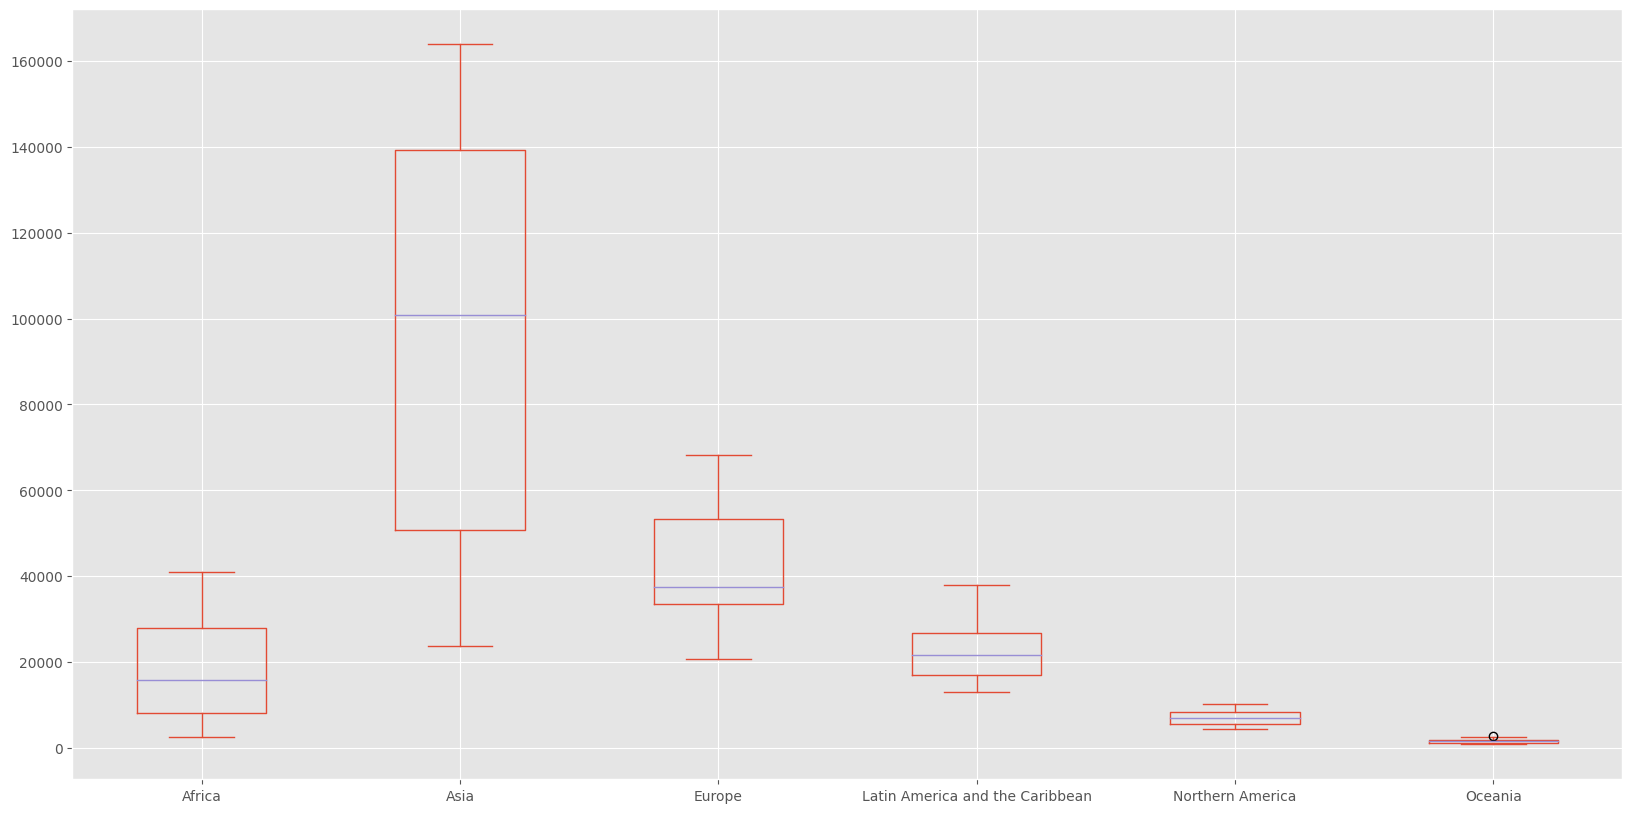

In [39]:
cdf[years].T.plot(kind='box',figsize=(20,10))